In [6]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from scipy.stats import ecdf

In [7]:
def generate_pareto_data(shape, N, scale=2000):
    D = np.random.pareto(shape, N) * scale
    return D

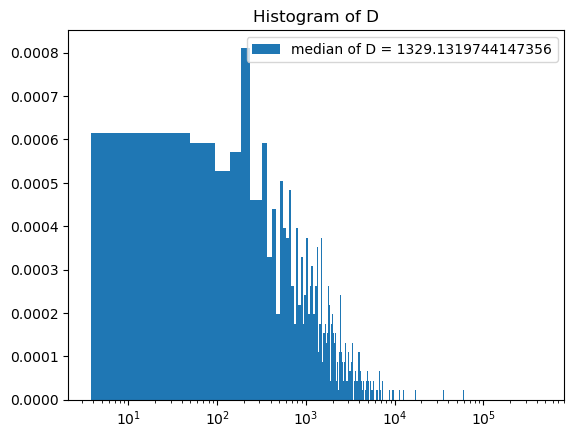

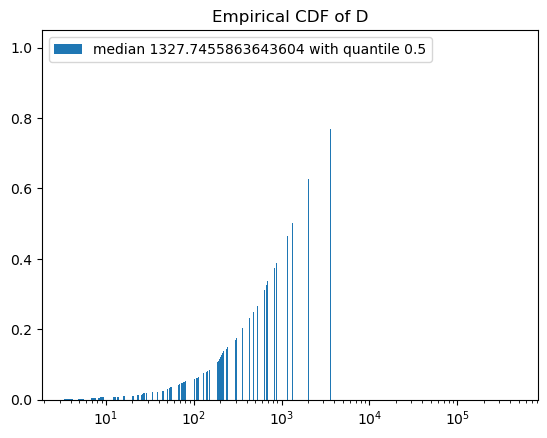

In [11]:
N = 1000

# discretize the data
num_bins = int(1E5)  # Number of bins
max_value = 1E5
bins = np.linspace(0, int(max_value), num_bins + 1)  # Bin edges
intervals = np.array([bins[:-1], bins[1:]]).T

data = generate_pareto_data(1.5, N)

# plot histogram of D
plt.hist(data, bins=int(1E4), label=f"median of D = {np.median(data)}", density=True)
plt.xscale('log')
plt.title('Histogram of D')
plt.legend()
plt.show()

# compute the empirical cumulative distribution function of D
from scipy.stats import ecdf

cf = ecdf(data)
cf_dict = dict(zip(cf.cdf.quantiles, cf.cdf.probabilities))
median = cf.cdf.quantiles[cf.cdf.probabilities >= 0.5][0]
# plot the empirical cumulative distribution function of D
plt.bar(cf.cdf.quantiles, cf.cdf.probabilities, label=f'median {median} with quantile {cf_dict[median]}')
plt.xscale('log')
plt.title('Empirical CDF of D')
plt.legend()
plt.show()